In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")

In [2]:
path =  'data2.xlsx'
data = pd.read_excel(path, header=0) *1000000000
data.head()

,X,Y
0,-1.794992,-1.808499
1,-0.018219,-0.027140
2,0.648844,0.613729
3,-2.117369,-2.106085
4,-0.703432,-0.661334


In [3]:
data.describe()

,X,Y
count,36.000000,36.000000
mean,-0.165542,-0.163945
std,1.027313,1.030803
min,-3.897269,-3.929196
25%,-0.408316,-0.382623
50%,-0.020960,-0.012569
75%,0.412534,0.409248
max,1.510657,1.495447


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
X    36 non-null float64
Y    36 non-null float64
dtypes: float64(2)
memory usage: 704.0 bytes


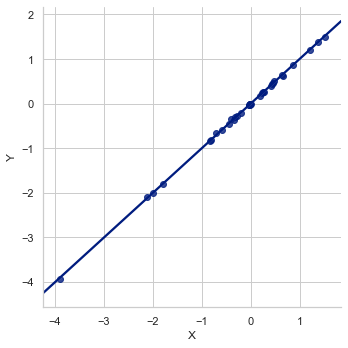

In [5]:
sns.lmplot('X', 'Y', data)
plt.show()


首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$ 

多变量假设公式${{h}_{\theta }}\left( x \right)$的由来：
多变量的假设 ${{h}_{\theta }}\left( x \right)$ 表示为：${{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$

这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，

则公式转化为:${{h}_{\theta }}\left( x \right)={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$  

此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 

因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$，其中上标T代表矩阵转置。

In [6]:
def computeCost(X, y, theta):
    '''
    代价函数
    '''
    inner = np.power(((X * theta.T) - y), 2) #特征矩阵X的维度是 m*(n+1)，theta的维度是1*(n+1)
    return np.sum(inner) / (2 * len(X))

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [7]:
data.insert(0, 'Ones', 1)#在第一列插入数据

现在我们来做一些变量初始化。

In [8]:
# set X (training data) and y (target variable)
cols = data.shape[1]#df.shape函数用来查看行数和列数，值为 0 时查看行数，值为 1 时查看列数
print(cols)
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#y是所有行，最后一列

3


观察下 X (训练集) and y (目标变量)是否正确.

In [9]:
X.head()#head()是观察前5行

,Ones,X
0,1,-1.794992
1,1,-0.018219
2,1,0.648844
3,1,-2.117369
4,1,-0.703432


In [10]:
y.head()

,Y
0,-1.808499
1,-0.027140
2,0.613729
3,-2.106085
4,-0.661334


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

theta 是一个(1,2)矩阵

In [12]:
theta

matrix([[0, 0]])

看下维度

In [13]:
X.shape, theta.shape, y.shape

((36, 2), (1, 2), (36, 1))

计算代价函数 (theta初始值为0).

In [14]:
computeCost(X, y, theta)

0.5299588846568618

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

将$J\left( \theta  \right)$带入，求导后，公式变为：

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}})}x_{j}^{(i)}$$

In [15]:
def gradientDescent(X, y, theta, alpha, iters):
    '''
    梯度下降
    '''
    temp = np.matrix(np.zeros(theta.shape)) #[0, 0]
    parameters = int(theta.ravel().shape[1]) #将theta打平，再取其列数。即看有几个theta
    cost = np.zeros(iters) #(1,iters)零矩阵
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j]) #数组对应元素位置相乘
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数iters。

In [104]:
alpha = 0.00105
iters = 5000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [105]:
final_theta, cost = gradientDescent(X, y, theta, alpha, iters)
final_theta

matrix([[-0.00238613,  0.99749987]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [106]:
computeCost(X, y, final_theta)

0.00019242851075247983

In [107]:
a = 0.149298980405173
f = final_theta[0, 0] + (final_theta[0, 1] * a)
f

0.1465395859651332

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

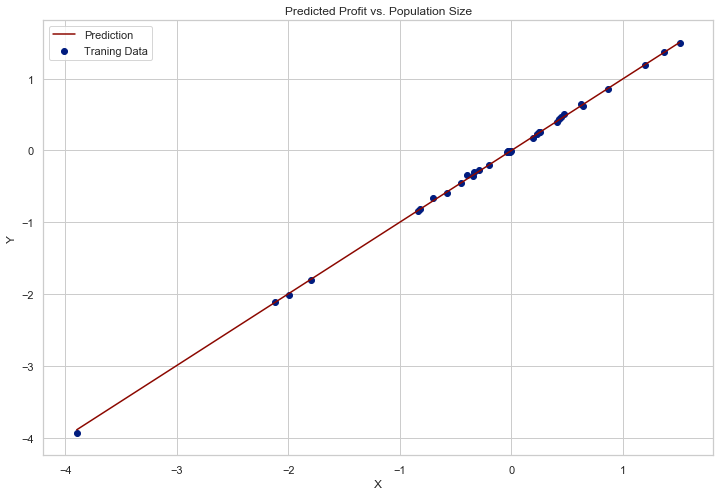

In [110]:
x = np.linspace(data.X.min(), data.X.max(), 100)
f = final_theta[0, 0] + (final_theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.X, data.Y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

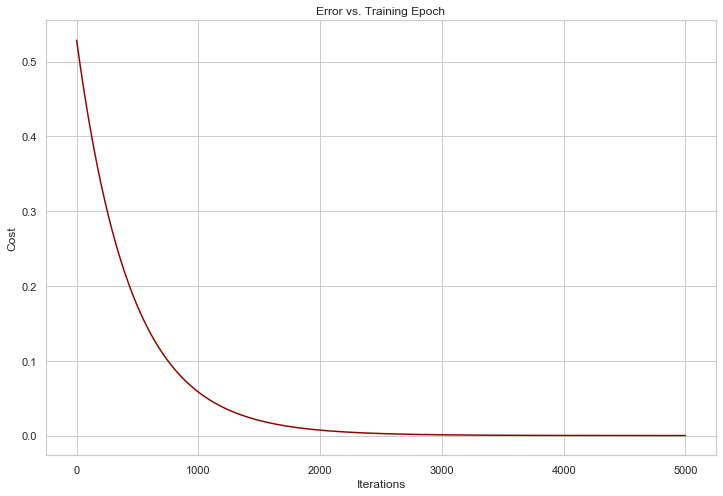

In [111]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()